In [1]:
from dateutil.parser import parse
import graphlab as gl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1475165699.log


This non-commercial license of GraphLab Create for academic use is assigned to jlorince@indiana.edu and will expire on May 03, 2017.


In [2]:
totals_pubs = pd.Series(index=pd.date_range('1950-01-01','2015-12-31',freq='AS',),data=[97529,102475,106673,108515,113949,100346,115704,122845,133961,137311,152292,179267,188095,196106,221271,288753,327167,349344,364851,399384,405709,420089,448565,459029,495345,566369,606671,683684,703905,728908,749425,775628,810977,875161,893747,893536,909200,920189,901468,856502,880419,901808,922010,963477,1015818,1080336,1130853,1159929,1161957,1187808,1205276,1189963,1234480,1270516,1356955,1434957,1495934,1567550,1655220,1716898,1750645,1836125,1913473,2005909,2027312,1809485,])

In [3]:
sf_joined = gl.SFrame('../data/genomics_joined.sframe/')

In [4]:
df = sf_joined.to_dataframe()
df['date'] = df['date'].apply(lambda x: parse(x))
df = df[df['date']<parse('2016-01-01')]
df['year'] = df['date'].apply(lambda x: x.year)

In [5]:
first_year = df['year'].min()

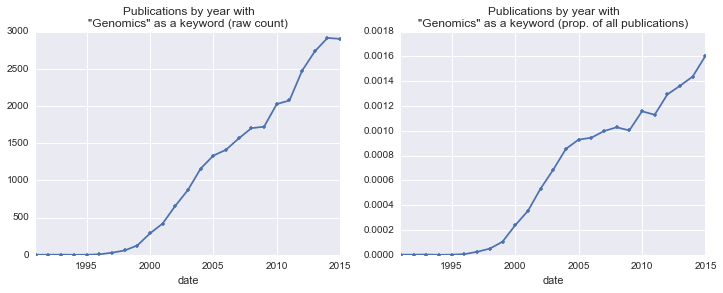

In [6]:
fig,axes = plt.subplots(1,2,figsize=(12,4))
df.set_index('date').resample('AS')['uid'].count().plot(marker='.',ax=axes[0])
axes[0].set_title('Publications by year with\n"Genomics" as a keyword (raw count)')
(df.set_index('date').resample('AS')['uid'].count() / totals_pubs[str(first_year):]).plot(marker='.',ax=axes[1])
axes[1].set_title('Publications by year with\n"Genomics" as a keyword (prop. of all publications)')

In [7]:
journal_piv = df.groupby(['year','source_title'])['uid'].count().reset_index().pivot_table(index='year',columns='source_title',values='uid').fillna(0)
#.plot.area(legend=False)

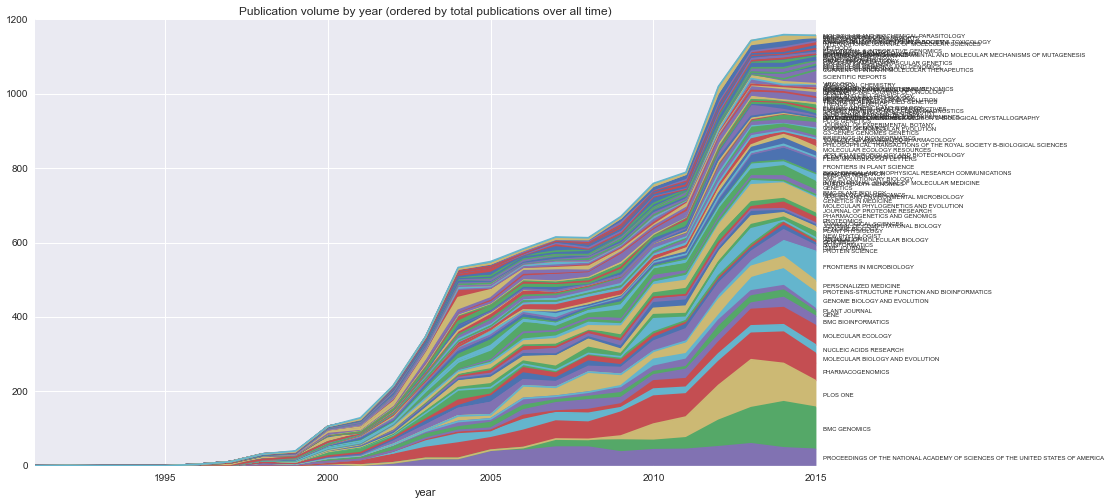

In [34]:
n_journals = 100
pop_sorted_journals =journal_piv.sum(0).reset_index()
colors = list(sns.color_palette(n_colors=len(pop_sorted_journals)))
#np.random.seed(7)
#np.random.shuffle(colors)
pop_sorted_journals['color'] = colors
journals = pop_sorted_journals.sort_values(0,ascending=False)[:n_journals]
fig,ax = plt.subplots(1,1,figsize=(14,8))
journal_piv[journals['source_title']].plot.area(legend=False,ax=ax,colors=journals['color'])
ax2 = ax.twinx()
ax2.grid()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks((journal_piv[journals['source_title']].ix[2015].cumsum().values - journal_piv[journals['source_title']].ix[2015]*.5))
ax2.set_yticklabels(journal_piv[journals['source_title']].ix[2015].index.values,fontsize=6);
ax.set_title('Publication volume by year (ordered by total publications over all time)');

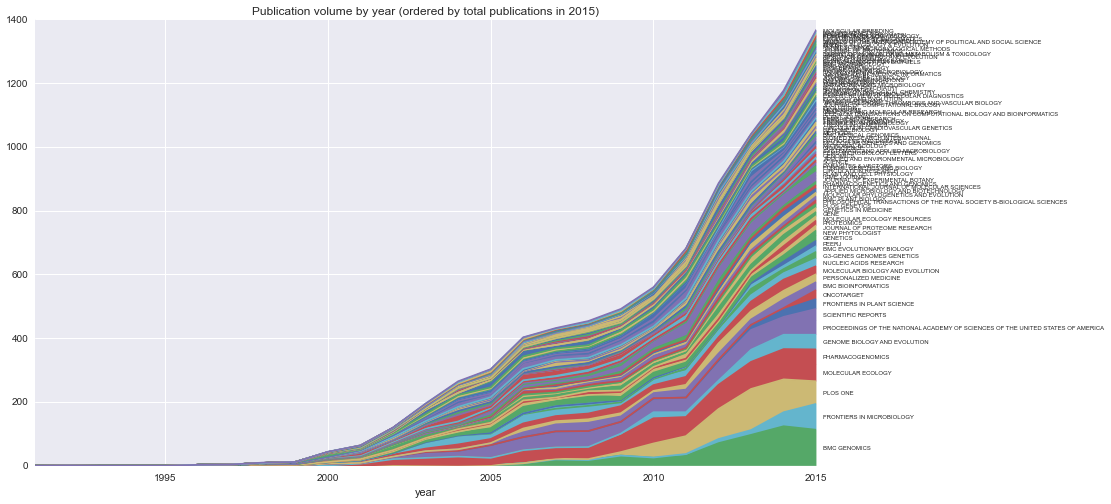

In [35]:
n_journals = 100
pop_sorted_journals =journal_piv.ix[2015].reset_index()
colors = list(sns.color_palette(n_colors=len(pop_sorted_journals)))
# np.random.seed(7)
# np.random.shuffle(colors)
pop_sorted_journals['color'] = colors
journals = pop_sorted_journals.sort_values(2015,ascending=False)[:n_journals]
fig,ax = plt.subplots(1,1,figsize=(14,8))
journal_piv[journals['source_title']].plot.area(legend=False,ax=ax,colors=journals['color'])
ax2 = ax.twinx()
ax2.grid()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks((journal_piv[journals['source_title']].ix[2015].cumsum().values - journal_piv[journals['source_title']].ix[2015]*.5))
ax2.set_yticklabels(journal_piv[journals['source_title']].ix[2015].index.values,fontsize=6);
ax.set_title('Publication volume by year (ordered by total publications in 2015)');

In [32]:
journal_piv['BMC GENOMICS']

year
1991      0.0
1992      0.0
1993      0.0
1995      0.0
1996      0.0
1997      0.0
1998      0.0
1999      0.0
2000      0.0
2001      0.0
2002      0.0
2003      2.0
2004      2.0
2005      2.0
2006      8.0
2007     20.0
2008     18.0
2009     32.0
2010     25.0
2011     31.0
2012     71.0
2013     97.0
2014    124.0
2015    113.0
Name: BMC GENOMICS, dtype: float64